# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** Wari
- **Email:** afrianwari89@gmail.com
- **ID Dicoding:** wari

## Menentukan Pertanyaan Bisnis

- Dalam kondisi musim seperti apa banyaknya penyewaan sepeda?
- kondisi hari apa banyaknya penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [1]:
# memasukan library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway

## Data Wrangling

### Gathering Data

In [2]:
# membaca data
bike_day=pd.read_csv("data/day.csv",delimiter=",")
bike_day.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- data yang dilakukan pengambilan yaitu berupa file .csv, sehingga dalam melakukan pembacaan file dengan library pandas harus menggunakan csv
- dari data tersebut ada beberapa kolom yang dapat dianalisa berdasarkan kebutuhan, kolom-kolom tersebut diantaranya instant,dteday,season,yr,mnth,holiday, weekday, workingday, weathersit, temp, atemp, hum,windspeed, casual,registered, cnt

### Assessing Data

In [3]:
# memerikan konsistensi data
unique_values = {
    'season': bike_day['season'].unique(),
    'yr': bike_day['yr'].unique(),
    'mnth': bike_day['mnth'].unique(),
    'holiday': bike_day['holiday'].unique(),
    'weekday': bike_day['weekday'].unique(),
    'workingday': bike_day['workingday'].unique(),
    'weathersit': bike_day['weathersit'].unique()
}
unique_values

# mengecek tipe data dan ketidaksesuaian
bike_day.info()

# melakukan pengecekan duplikasi
print("jumlah duplikasi:",bike_day.duplicated().sum())

# cek data missing value
print("jumlah data missing value",bike_day.isna().sum())

# mengecek dekripsi data
bike_day.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
jumlah duplikasi: 0
jumlah data missing value instant       0
dteday        0
season        0

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- Kolom season memiliki nilai yang konsisten: [1, 2, 3, 4].
Kolom yr memiliki nilai [0, 1], menunjukkan dua tahun berbeda dalam dataset.
Kolom mnth memiliki nilai [1-12], sesuai dengan 12 bulan.
Kolom holiday dan workingday memiliki nilai [0, 1], sesuai dengan boolean.
Kolom weekday memiliki nilai [0-6], mewakili hari dalam seminggu.
Kolom weathersit memiliki nilai [1, 2, 3].
- pada kolom dteday bertipe object sehingga harus diubah terlebih dahulu menjadi tipedata datetime
- tidak ada data yang missing value dan duplikasi data
-distribusi yang wajar pada setiap data

### Cleaning Data

In [4]:
# Mengubah kolom dteday menjadi tipedata datetime
bike_day['dteday'] = pd.to_datetime(bike_day['dteday'])

# merubah data numerik pada season menjadi kategori
season_mapping = {
    1: 'Springer',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
}
bike_day['season'] = bike_day['season'].map(season_mapping)

# merubah hari libur atau hari kerja
workingday_mapping = {
    0: 'Libur',
    1: 'Kerja'

}
bike_day['workingday'] = bike_day['workingday'].map(workingday_mapping)
bike_day.head()
bike_day.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    object        
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    object        
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Insight:**
- perubahan type data pada colum dteday yang sebelumnya object menjadi datetime
- merubah type data pada kolom season dan workingday menjadi kategorikal

## Exploratory Data Analysis (EDA)

### Explore ...

In [5]:
season_grouped = bike_day.groupby('season')['cnt'].agg(['mean', 'sum']).reset_index()
season_grouped

workingday_grouped = bike_day.groupby('workingday')['cnt'].agg(['mean', 'sum']).reset_index()
workingday_grouped

,workingday,mean,sum
0,Kerja,4584.820000,2292410
1,Libur,4330.168831,1000269


**Insight:**
- Rata-rata penyewaan sepeda terbanyak berada pada musim fall yaitu 5.644 dengan jumlah 1.061.129, di ikuti oleh summer dengan rata-rata 4.992,winter dengan rata-rata 4728 dan terakhir springer dengan rata-rata 2.604
- Rata-rata penyewaan sepeda terbanyak yaitu pada hari kerja dengan rata-rata 4584 lalu di ikuti hari libur dengan rata-rata 4.330

## Visualization & Explanatory Analysis

### Pertanyaan 1:

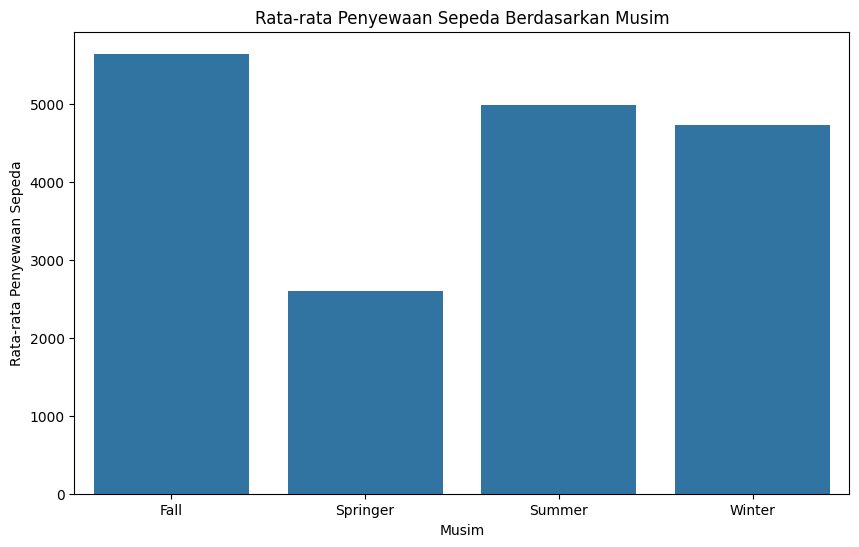

In [6]:
# visualisasi data season
plt.figure(figsize=(10, 6))
sns.barplot(x='season', y='mean', data=season_grouped)
plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Rata-rata Penyewaan Sepeda')
plt.show()

### Pertanyaan 2:

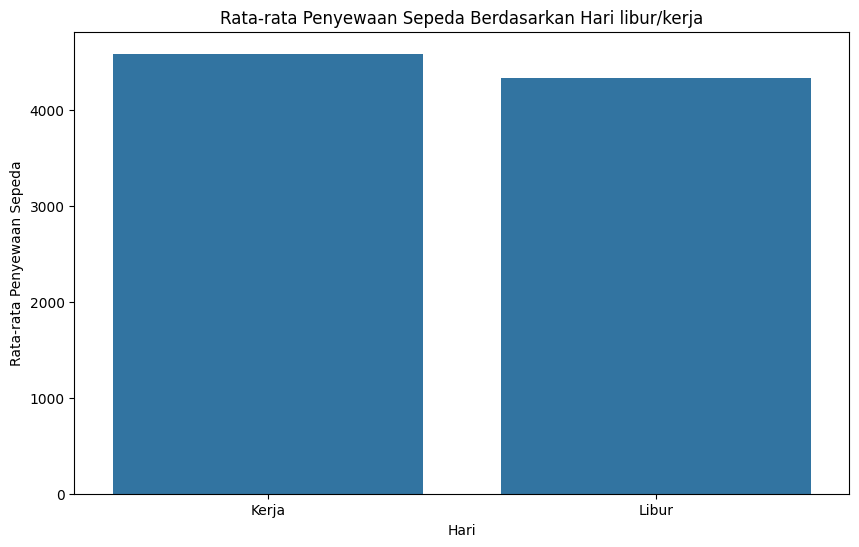

In [7]:
# visualisasi data workingday
plt.figure(figsize=(10, 6))
sns.barplot(x='workingday', y='mean', data=workingday_grouped)
plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Hari libur/kerja')
plt.xlabel('Hari')
plt.ylabel('Rata-rata Penyewaan Sepeda')
plt.show()

**Insight:**
- Rata-rata penyewaan terbanyak dilakukan di kondisi musim fall
- rata-rata penyewaan terbanyak dilakukan di hari kerja

## Analisis Lanjutan (Opsional)

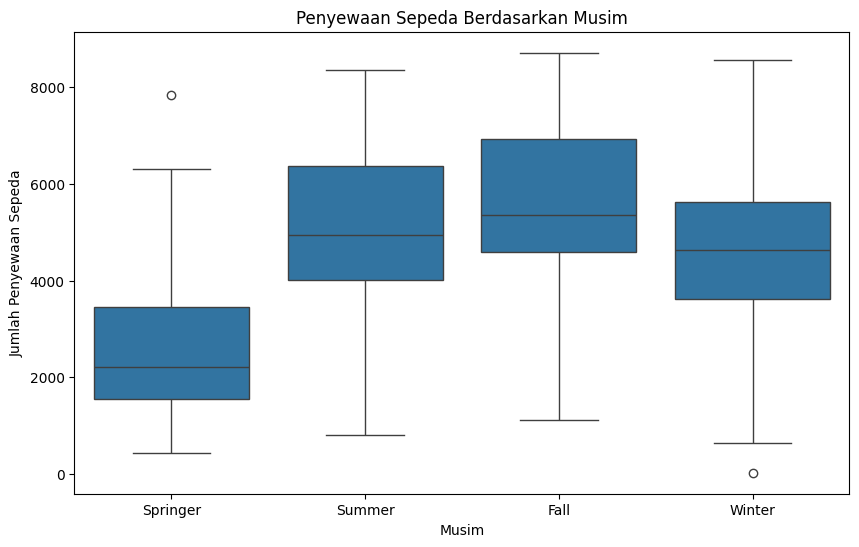

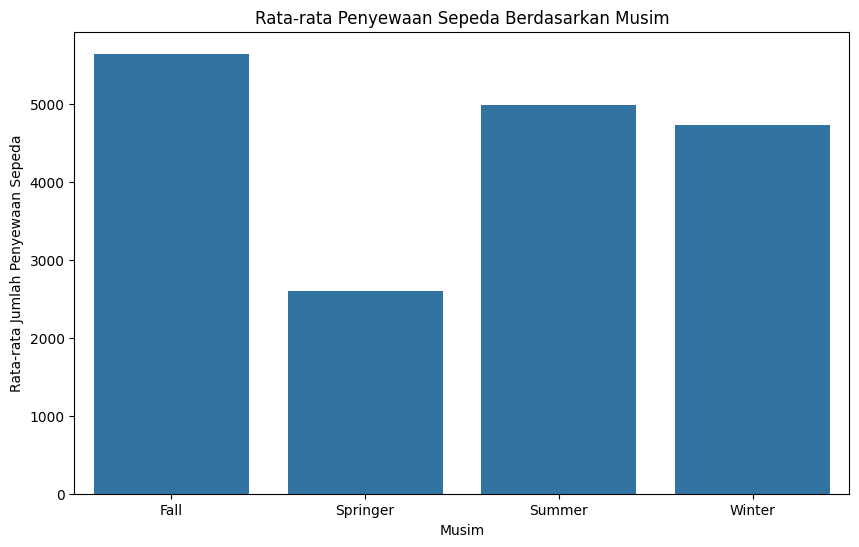

      Musim  Rata-rata Penyewaan  Total Penyewaan  Jumlah Hari
0      Fall          5644.303191          1061129          188
1  Springer          2604.132597           471348          181
2    Summer          4992.331522           918589          184
3    Winter          4728.162921           841613          178
Winter count: 178
Spring count: 181
Summer count: 184
Fall count: 188
F-Statistic: 128.76962156570784
P-Value: 6.720391362913175e-67


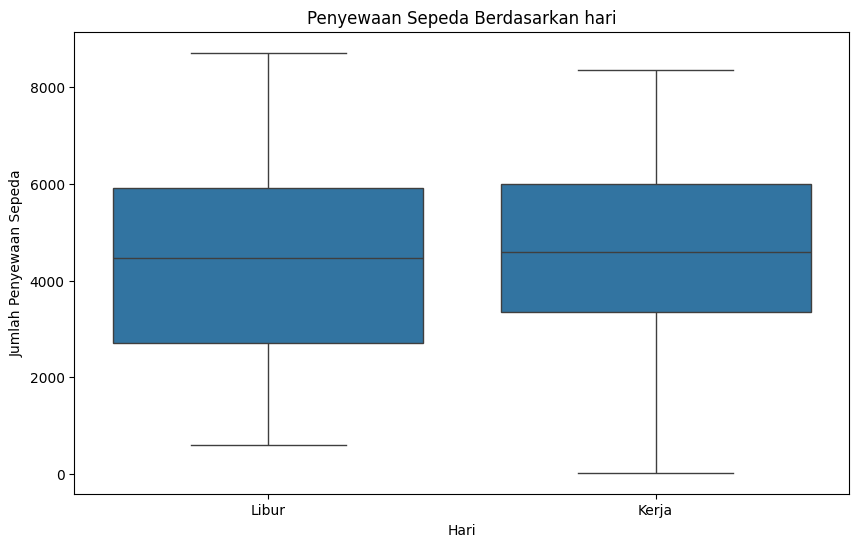

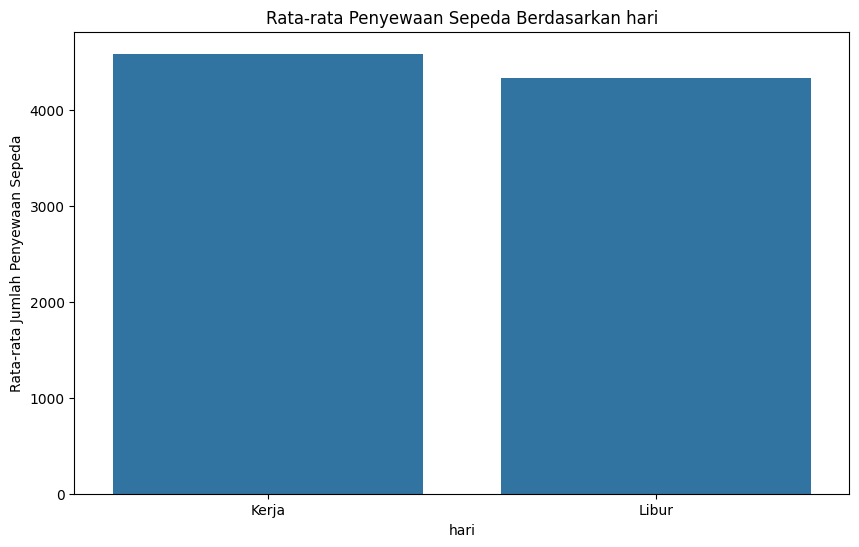

    Hari  Rata-rata Penyewaan  Total Penyewaan  Jumlah Hari
0  Kerja          4584.820000          2292410          500
1  Libur          4330.168831          1000269          231
Hari libur: 231
Hari kerja: 500
F-Statistic: 2.736742283191394
P-Value: 0.0984949616002635


In [8]:
# Box Plot untuk penyewaan sepeda berdasarkan musim
plt.figure(figsize=(10, 6))
sns.boxplot(x='season', y='cnt', data=bike_day)
plt.title('Penyewaan Sepeda Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.show()

# Bar Plot untuk rata-rata penyewaan sepeda pada setiap musim
season_avg = bike_day.groupby('season')['cnt'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='season', y='cnt', data=season_avg)
plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Rata-rata Jumlah Penyewaan Sepeda')
plt.show()

season_stats = bike_day.groupby('season')['cnt'].agg(['mean', 'sum', 'count']).reset_index()
season_stats.columns = ['Musim', 'Rata-rata Penyewaan', 'Total Penyewaan', 'Jumlah Hari']
print(season_stats)

# Menyiapkan data untuk ANOVA
winter = bike_day[bike_day['season'] == 'Winter']['cnt']
springer = bike_day[bike_day['season'] == 'Springer']['cnt']
summer = bike_day[bike_day['season'] == 'Summer']['cnt']
fall = bike_day[bike_day['season'] == 'Fall']['cnt']


# Memastikan setiap subset tidak kosong
print("Winter count:", len(winter))
print("Spring count:", len(springer))
print("Summer count:", len(summer))
print("Fall count:", len(fall))

# Periksa apakah setiap subset memiliki data
if len(winter) > 0 and len(springer) > 0 and len(summer) > 0 and len(fall) > 0:
    # Melakukan uji ANOVA
    f_stat, p_value = f_oneway(winter, springer, summer, fall)
    print(f"F-Statistic: {f_stat}")
    print(f"P-Value: {p_value}")
else:
    print("Salah satu subset musim tidak memiliki data.")



# ===========================pertanyaan 2
# Box Plot untuk penyewaan sepeda berdasarkan hari
plt.figure(figsize=(10, 6))
sns.boxplot(x='workingday', y='cnt', data=bike_day)
plt.title('Penyewaan Sepeda Berdasarkan hari')
plt.xlabel('Hari')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.show()

# Bar Plot untuk rata-rata penyewaan sepeda pada setiap hari
workingday_avg = bike_day.groupby('workingday')['cnt'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='workingday', y='cnt', data=workingday_avg)
plt.title('Rata-rata Penyewaan Sepeda Berdasarkan hari')
plt.xlabel('hari')
plt.ylabel('Rata-rata Jumlah Penyewaan Sepeda')
plt.show()

workingday_stats = bike_day.groupby('workingday')['cnt'].agg(['mean', 'sum', 'count']).reset_index()
workingday_stats.columns = ['Hari', 'Rata-rata Penyewaan', 'Total Penyewaan', 'Jumlah Hari']
print(workingday_stats)

# Menyiapkan data untuk ANOVA
libur= bike_day[bike_day['workingday'] == 'Libur']['cnt']
kerja = bike_day[bike_day['workingday'] == 'Kerja']['cnt']


# Memastikan setiap subset tidak kosong
print("Hari libur:", len(libur))
print("Hari kerja:", len(kerja))


# Periksa apakah setiap subset memiliki data
if len(libur) > 0 and len(kerja) > 0 :
    # Melakukan uji ANOVA
    f_stat_w, p_value_w = f_oneway(libur,kerja)
    print(f"F-Statistic: {f_stat_w}")
    print(f"P-Value: {p_value_w}")
else:
    print("Salah satu subset musim tidak memiliki data.")


## Conclusion

conclution pertanyaan 1
- terdapat perbedaan yang signifikan secara statistik dalam jumlah penyewaan sepeda antar musim. Hal ini menunjukkan bahwa musim memengaruhi jumlah penyewaan sepeda.
-Strategi Musiman: Operator penyewaan sepeda dapat menyesuaikan strategi pemasaran dan operasional berdasarkan musim. Misalnya, meningkatkan promosi di musim dengan penyewaan rendah (seperti musim semi) atau menambah kapasitas di musim dengan penyewaan tinggi (seperti musim gugur).
-Perencanaan Stok dan Pemeliharaan: Menyediakan lebih banyak sepeda di musim dengan permintaan tinggi dan melakukan pemeliharaan di musim dengan permintaan rendah.

 Conclution pertanyaan 2
- F-statistik = 2.737 dan p-value = 0.0985 (> 0.05)
Karena p-value (0.0985) > α (0.05), maka gagal menolak H0
Artinya tidak ada perbedaan yang signifikan dalam jumlah penyewaan sepeda antara hari kerja (workingday=1) dan hari libur (workingday=0)
Pola penyewaan sepeda relatif konsisten antara hari kerja dan hari libur
- Strategi Operasional yang Konsisten:
Tidak perlu membedakan jumlah stok sepeda antara hari kerja dan hari libur
Dapat menerapkan strategi pelayanan yang seragam untuk setiap hari
-Fokus pada Faktor Lain:
Lebih baik mempertimbangkan faktor lain seperti musim atau cuaca dalam pengambilan keputusan
Menganalisis faktor-faktor lain yang mungkin lebih berpengaruh terhadap jumlah penyewaan